**CATBOOST**


In [ ]:
!pip install catboost

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

In [ ]:
file_path = '/content/drive/MyDrive/data/Chennai_1990_2022_Madras.csv'  # Update this to your file path
data = pd.read_csv(file_path)

In [ ]:
data['time'] = pd.to_datetime(data['time'], format='%d-%m-%Y')

In [ ]:
data['prcp_lag1'] = data['prcp'].shift(1)
data['prcp_lag2'] = data['prcp'].shift(2)
data['prcp_rolling_mean'] = data['prcp'].rolling(window=7).mean()

In [ ]:
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month
data['day_of_year'] = data['time'].dt.dayofyear
data['day_of_week'] = data['time'].dt.dayofweek

In [ ]:
data.dropna(inplace=True)

In [ ]:
X = data[['tavg', 'tmin', 'tmax', 'prcp_lag1', 'prcp_lag2', 'prcp_rolling_mean', 'month', 'day_of_year', 'day_of_week']]
y = data['prcp']

In [ ]:
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42,shuffle=False)


In [ ]:
catboost_model = CatBoostRegressor(loss_function='MAE', iterations=1000, learning_rate=0.1, depth=6, random_seed=42, verbose=100)
catboost_model.fit(X_train, y_train)


0:	learn: 5.2359586	total: 48.9ms	remaining: 48.8s
100:	learn: 3.1673324	total: 248ms	remaining: 2.21s
200:	learn: 2.6380917	total: 532ms	remaining: 2.12s
300:	learn: 2.3456407	total: 1s	remaining: 2.33s
400:	learn: 2.1784511	total: 1.35s	remaining: 2.02s
500:	learn: 2.0759118	total: 1.68s	remaining: 1.68s
600:	learn: 2.0173356	total: 2.1s	remaining: 1.4s
700:	learn: 1.9429354	total: 2.6s	remaining: 1.11s
800:	learn: 1.8560291	total: 3.11s	remaining: 773ms
900:	learn: 1.7639925	total: 3.61s	remaining: 397ms
999:	learn: 1.7040192	total: 4s	remaining: 0us


In [ ]:
cat_pred = catboost_model.predict(X_test)

In [ ]:
cat_mae = mean_absolute_error(y_test, cat_pred)
print(f' cat Mean Absolute Error: {cat_mae}')

 cat Mean Absolute Error: 2.8720383298230576


In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
cat_mse = mean_squared_error(y_test, cat_pred)
print(f' cat Mean Squared Error: {cat_mse}')
cat_rmse = sqrt(cat_mse)
print(f'cat rmse:',cat_rmse)
# Calculate R-squared (R²) score
cat_r2 = r2_score(y_test, cat_pred)
print(f'R² Score: {cat_r2}')

 cat Mean Squared Error: 37.18158593195164
cat rmse: 6.097670533240676
R² Score: 0.5018716578456275


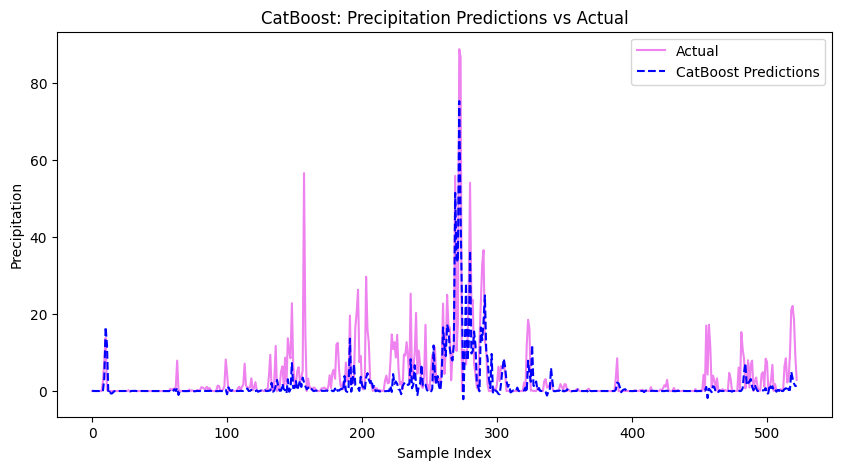

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', color='violet')
plt.plot(cat_pred, label='CatBoost Predictions', color='blue', linestyle='--')
plt.legend()
plt.title('CatBoost: Precipitation Predictions vs Actual')
plt.xlabel('Sample Index')
plt.ylabel('Precipitation')
plt.show()

**XGBOOST**


In [ ]:
from xgboost import XGBRegressor
xgboost_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgboost_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
xgboost_pred = xgboost_model.predict(X_test)

In [ ]:
xgb_mae = mean_absolute_error(y_test, xgboost_pred)
print(f' xgboost Mean Absolute Error: {xgb_mae}')
xgb_mse = mean_squared_error(y_test,xgboost_pred)
print(f' xgboost Mean Squared Error: {xgb_mse}')
xgb_rmse = sqrt(xgb_mse)
print(f'xgboost rmse:',xgb_rmse)
# Calculate R-squared (R²) score
xgb_r2 = r2_score(y_test, xgboost_pred)
print(f'R² Score: {xgb_r2}')


 xgboost Mean Absolute Error: 2.7686124408254345
 xgboost Mean Squared Error: 32.40493964570692
xgboost rmse: 5.692533675412638
R² Score: 0.565865240582512


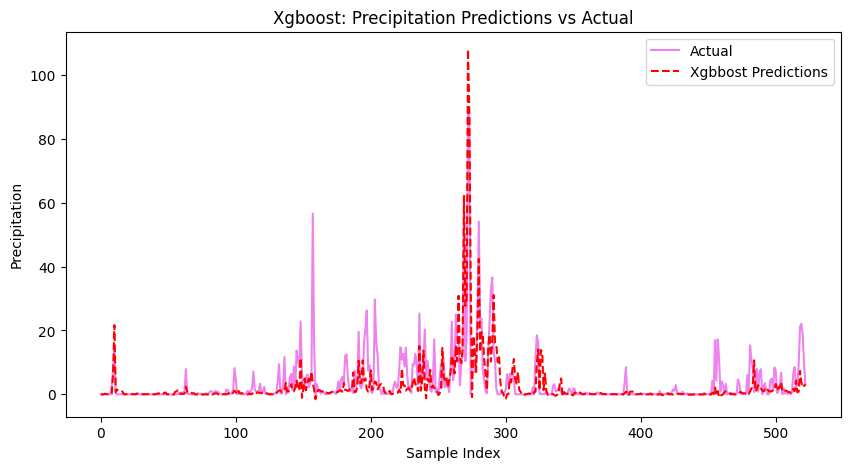

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', color='violet')
plt.plot(xgboost_pred, label='Xgbbost Predictions', color='red', linestyle='--')
plt.legend()
plt.title('Xgboost: Precipitation Predictions vs Actual')
plt.xlabel('Sample Index')
plt.ylabel('Precipitation')
plt.show()

**Bi-LSTM**

In [ ]:

# !pip install tensorflow

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
file_path = '/content/drive/MyDrive/data/Chennai_1990_2022_Madras.csv'
data = pd.read_csv(file_path)

# Feature engineering
data['time'] = pd.to_datetime(data['time'], format='%d-%m-%Y')
data['prcp_lag1'] = data['prcp'].shift(1)
data['prcp_lag2'] = data['prcp'].shift(2)
data['prcp_rolling_mean'] = data['prcp'].rolling(window=7).mean()
data['prcp_rolling_std'] = data['prcp'].rolling(window=7).std()  # New feature: rolling std dev
data['month'] = data['time'].dt.month
data['day_of_year'] = data['time'].dt.dayofyear
data['day_of_week'] = data['time'].dt.dayofweek
data.dropna(inplace=True)

# Define features and target
X = data[['tavg', 'tmin', 'tmax', 'prcp_lag1', 'prcp_lag2', 'prcp_rolling_mean', 'prcp_rolling_std', 'month', 'day_of_year', 'day_of_week']]
y = data['prcp']

# Scale features and reshape for LSTM
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X).reshape((X.shape[0], 1, X.shape[1]))

# Scale target variable for stability during training
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42, shuffle=False)

# Improved LSTM model with Bidirectional layers and increased capacity
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(0.3),
    LSTM(32, return_sequences=True),
    Dropout(0.3),
    LSTM(16, return_sequences=False),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1)
])

# Compile and set early stopping
model.compile(optimizer='adam', loss='mae')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])

# Predict and inverse transform to original scale
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_orig = scaler_y.inverse_transform(y_test)

# Calculate MAE
lstm_mae = mean_absolute_error(y_test_orig, y_pred)
print(f'Optimized LSTM Mean Absolute Error: {lstm_mae}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0164 - val_loss: 0.0485
Epoch 2/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0126 - val_loss: 0.0480
Epoch 3/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - val_loss: 0.0469
Epoch 4/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0129 - val_loss: 0.0460
Epoch 5/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0126 - val_loss: 0.0457
Epoch 6/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0123 - val_loss: 0.0451
Epoch 7/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0112 - val_loss: 0.0444
Epoch 8/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0134 - val_loss: 0.0448
Epoch 9/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0119 - val_loss: 0.0456
Epoch 10/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0127 - val_loss: 0.0445
Epoch 11/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0117 - val_loss: 0.0444
Epoch 12/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
l_mse = mean_squared_error(y_test_orig, y_pred)
print(f' lstm Mean Squared Error: {l_mse}')
l_rmse = sqrt(l_mse)
print(f'lstm rmse:',l_rmse)
# Calculate R-squared (R²) score
l_r2 = r2_score(y_test_orig, y_pred)
print(f'R² Score: {l_r2}')

 lstm Mean Squared Error: 51.55037796980762
lstm rmse: 7.1798591887172565
R² Score: 0.30937038666054306


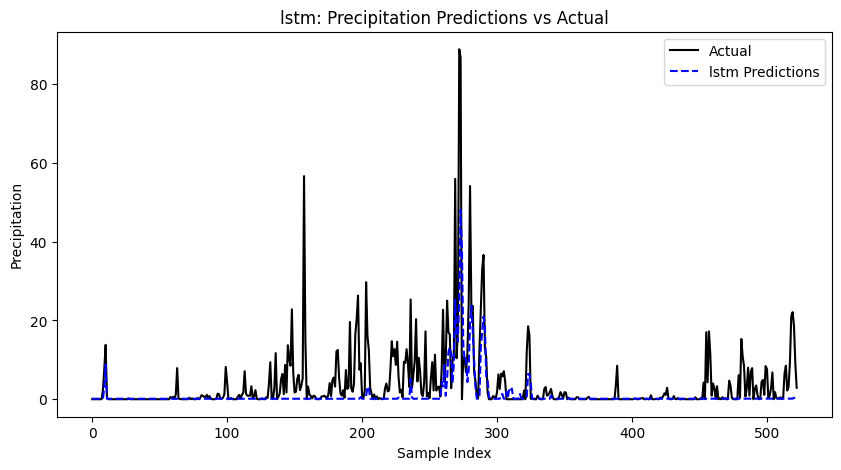

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(y_test_orig, label='Actual', color='black')
plt.plot(y_pred, label='lstm Predictions', color='blue', linestyle='--')
plt.legend()
plt.title('lstm: Precipitation Predictions vs Actual')
plt.xlabel('Sample Index')
plt.ylabel('Precipitation')
plt.show()